# Prepared by: Ahmed Yasser



## 🕵️‍♂️ Credit Card Fraud Detection - Exploratory Data Analysis (EDA)

This project focuses on analyzing and visualizing the **Credit Card Fraud Detection dataset**, which contains transactions made by European cardholders in September 2013. The dataset is highly **imbalanced** (fraud cases are very rare compared to non-fraud transactions), making it a challenging problem for machine learning.

#### 📌 Objectives of this EDA
- Understand the **distribution of fraudulent vs non-fraudulent transactions**.
- Explore the **relationship between features** using correlation matrices and visualizations.
- Compare **fraud vs non-fraud transaction patterns** across time, amount, and principal components.
- Apply **dimensionality reduction techniques** ( PCA ) to visualize separability of fraud vs non-fraud.

#### 📊 Techniques Used
- **Univariate Analysis**: Histograms, KDE plots, boxplots.
- **Bivariate Analysis**: Correlation heatmaps, fraud vs non-fraud comparisons.
- **Dimensionality Reduction**: PCA.
- **Class Imbalance Analysis**: Count plots, pie charts.
- **Feature Importance**: Using Random Forests to highlight top features.


# Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# load data

In [26]:
data = pd.read_csv('data/train.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,119191.0,2.052427,-0.133236,-1.740621,0.277935,0.337999,-0.826933,0.334629,-0.227039,0.267655,...,-0.006518,0.121300,0.037733,-0.356498,0.147822,0.569149,-0.103929,-0.091958,8.73,0
1,71750.0,1.220356,-0.159191,-0.444349,-0.094437,0.104457,-0.345790,0.170867,-0.094996,0.187572,...,-0.088775,-0.364654,-0.140851,-0.707308,0.415661,1.087767,-0.102532,-0.008335,59.95,0
2,151977.0,0.892824,-1.440698,-0.637940,3.912871,0.099291,2.433288,-0.308891,0.603227,-0.113826,...,0.484969,0.487304,-0.122694,-0.598803,-0.594563,0.062841,-0.033426,0.038254,460.65,0
3,55709.0,-3.146021,2.247634,0.901397,0.146162,-2.109360,-0.148312,-1.533191,2.073663,0.499394,...,0.050567,-0.037019,0.107000,0.392857,0.303597,0.379544,-0.148990,0.074965,4.78,0
4,66654.0,1.194996,-0.007495,0.301285,0.750199,-0.297494,-0.405836,0.060410,-0.150482,0.400860,...,-0.234931,-0.545566,-0.089418,-0.064036,0.527305,0.294221,-0.025980,0.015637,44.31,0


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170884 entries, 0 to 170883
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    170884 non-null  float64
 1   V1      170884 non-null  float64
 2   V2      170884 non-null  float64
 3   V3      170884 non-null  float64
 4   V4      170884 non-null  float64
 5   V5      170884 non-null  float64
 6   V6      170884 non-null  float64
 7   V7      170884 non-null  float64
 8   V8      170884 non-null  float64
 9   V9      170884 non-null  float64
 10  V10     170884 non-null  float64
 11  V11     170884 non-null  float64
 12  V12     170884 non-null  float64
 13  V13     170884 non-null  float64
 14  V14     170884 non-null  float64
 15  V15     170884 non-null  float64
 16  V16     170884 non-null  float64
 17  V17     170884 non-null  float64
 18  V18     170884 non-null  float64
 19  V19     170884 non-null  float64
 20  V20     170884 non-null  float64
 21  V21     17

In [28]:
data.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,...,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000
mean,94966.107886,-0.001070,-0.000904,-0.002722,-0.002603,0.000151,0.000779,-0.000811,-0.002327,-0.000622,...,0.000957,0.000056,0.000475,-0.000894,-0.000593,-0.000738,0.000404,0.000422,88.511723,0.001785
std,47464.723773,1.958944,1.650481,1.521820,1.416490,1.394123,1.338331,1.260122,1.208709,1.098393,...,0.743974,0.726681,0.620647,0.605148,0.521128,0.481720,0.404540,0.314973,256.737144,0.042210
min,0.000000,-46.855047,-63.344698,-48.325589,-5.683171,-113.743307,-23.496714,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-36.666000,-2.836627,-7.081325,-2.604551,-9.895244,-15.430084,0.000000,0.000000
25%,54348.000000,-0.922071,-0.599127,-0.896376,-0.848978,-0.691840,-0.768986,-0.554440,-0.209596,-0.642036,...,-0.228068,-0.542831,-0.161063,-0.354552,-0.318057,-0.327631,-0.070719,-0.053019,5.637500,0.000000
50%,84923.500000,0.016603,0.065839,0.177007,-0.020895,-0.054185,-0.274228,0.040417,0.021461,-0.051777,...,-0.029547,0.006488,-0.010688,0.040433,0.016916,-0.051262,0.001520,0.011216,22.020000,0.000000
75%,139404.000000,1.316250,0.802518,1.028302,0.738812,0.612154,0.400359,0.569221,0.326026,0.595095,...,0.186681,0.528971,0.147814,0.437888,0.350188,0.240718,0.091713,0.078480,77.650000,0.000000
max,172792.000000,2.451888,22.057729,4.226108,16.875344,34.099309,73.301626,120.589494,18.282168,10.392889,...,27.202839,10.503090,22.528412,4.584549,6.070850,3.517346,31.612198,16.129609,25691.160000,1.000000


In [29]:
data.isnull().sum().max()

np.int64(0)

In [30]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [31]:
print('No Frauds', data['Class'].value_counts()[0] )
print('Frauds', data['Class'].value_counts()[1])

No Frauds 170579
Frauds 305


C:\Users\DeLL PRE 3530\AppData\Local\Temp\ipykernel_3544\1958090368.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data, palette=colors)


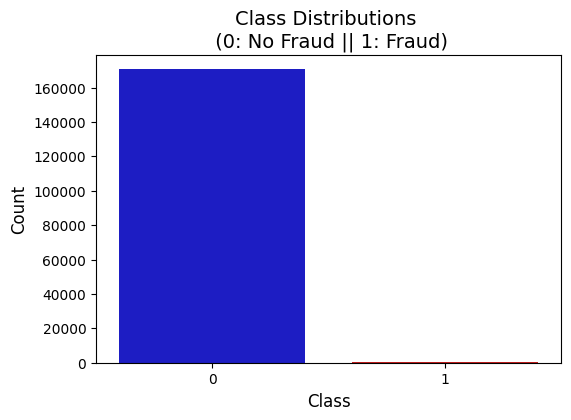

In [32]:
colors = ["#0101DF", "#DF0101"]  # Blue for 0, Red for 1

plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=data, palette=colors)

plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


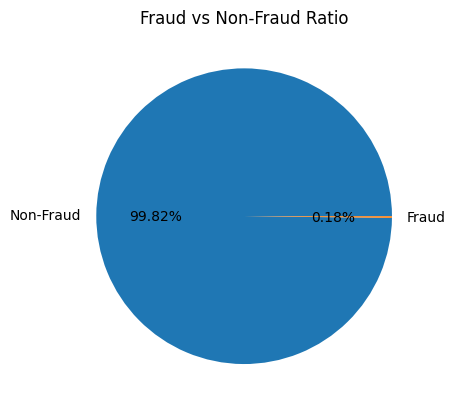

In [33]:
fraud_counts = data['Class'].value_counts()
plt.pie(fraud_counts, labels=['Non-Fraud','Fraud'], autopct='%1.2f%%', colors=['#1f77b4','#ff7f0e'])
plt.title("Fraud vs Non-Fraud Ratio")
plt.show()

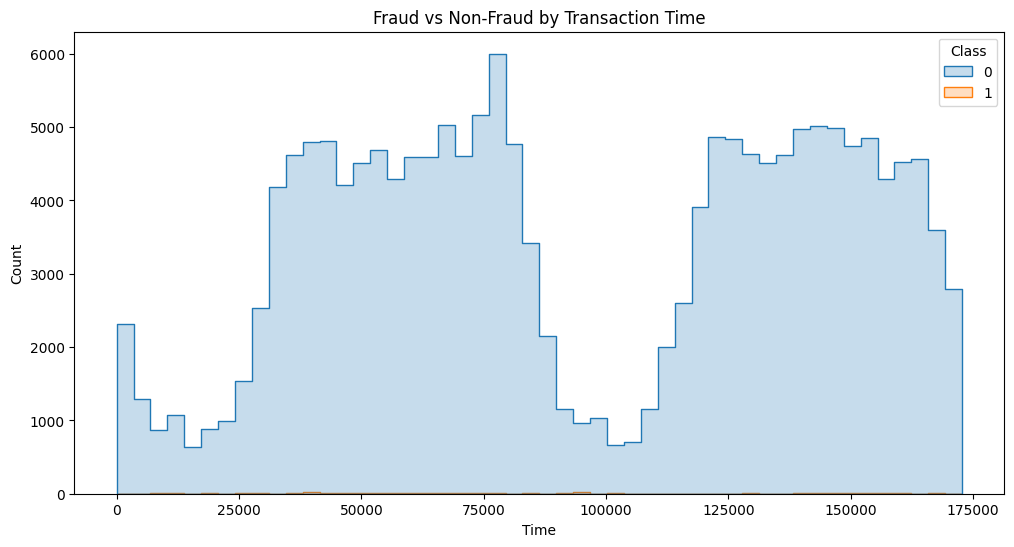

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(data=data, x='Time', hue='Class', bins=50, element='step', stat='count')
plt.title("Fraud vs Non-Fraud by Transaction Time")
plt.show()


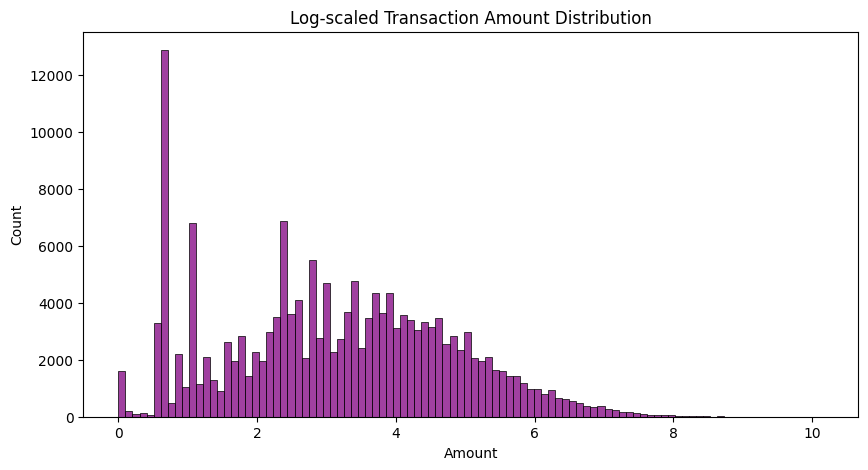

In [35]:
plt.figure(figsize=(10,5))
sns.histplot(np.log1p(data['Amount']), bins=100, color='purple')
plt.title("Log-scaled Transaction Amount Distribution")
plt.show()


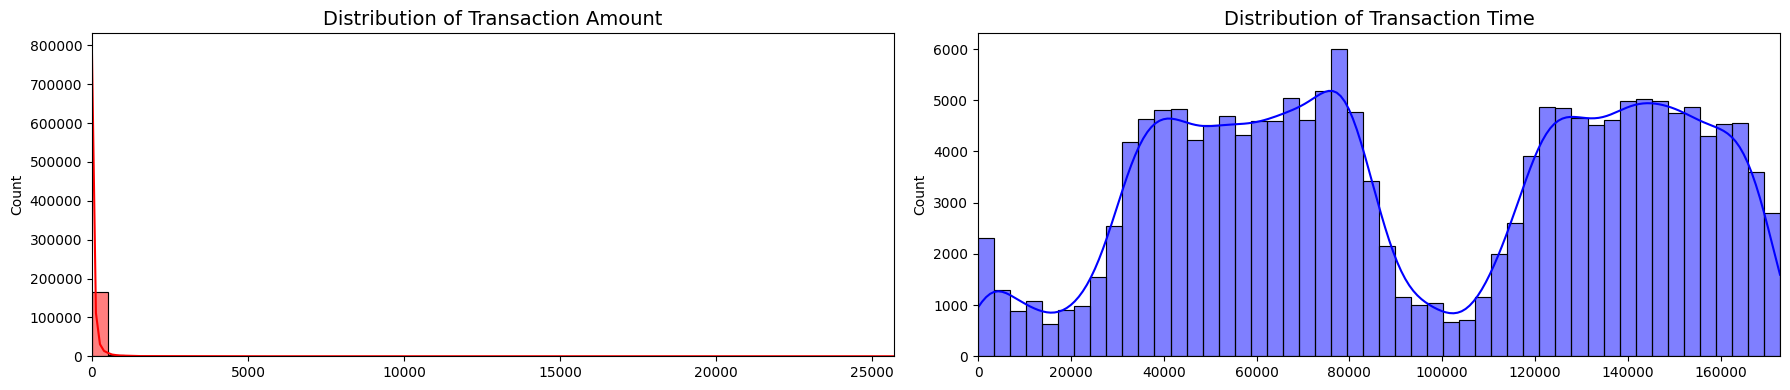

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

amount_val = data['Amount'].values
time_val = data['Time'].values

# Distribution of Transaction Amount
sns.histplot(amount_val, bins=50, ax=ax[0], color='r', kde=True)
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

# Distribution of Transaction Time
sns.histplot(time_val, bins=50, ax=ax[1], color='b', kde=True)
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.tight_layout()
plt.show()


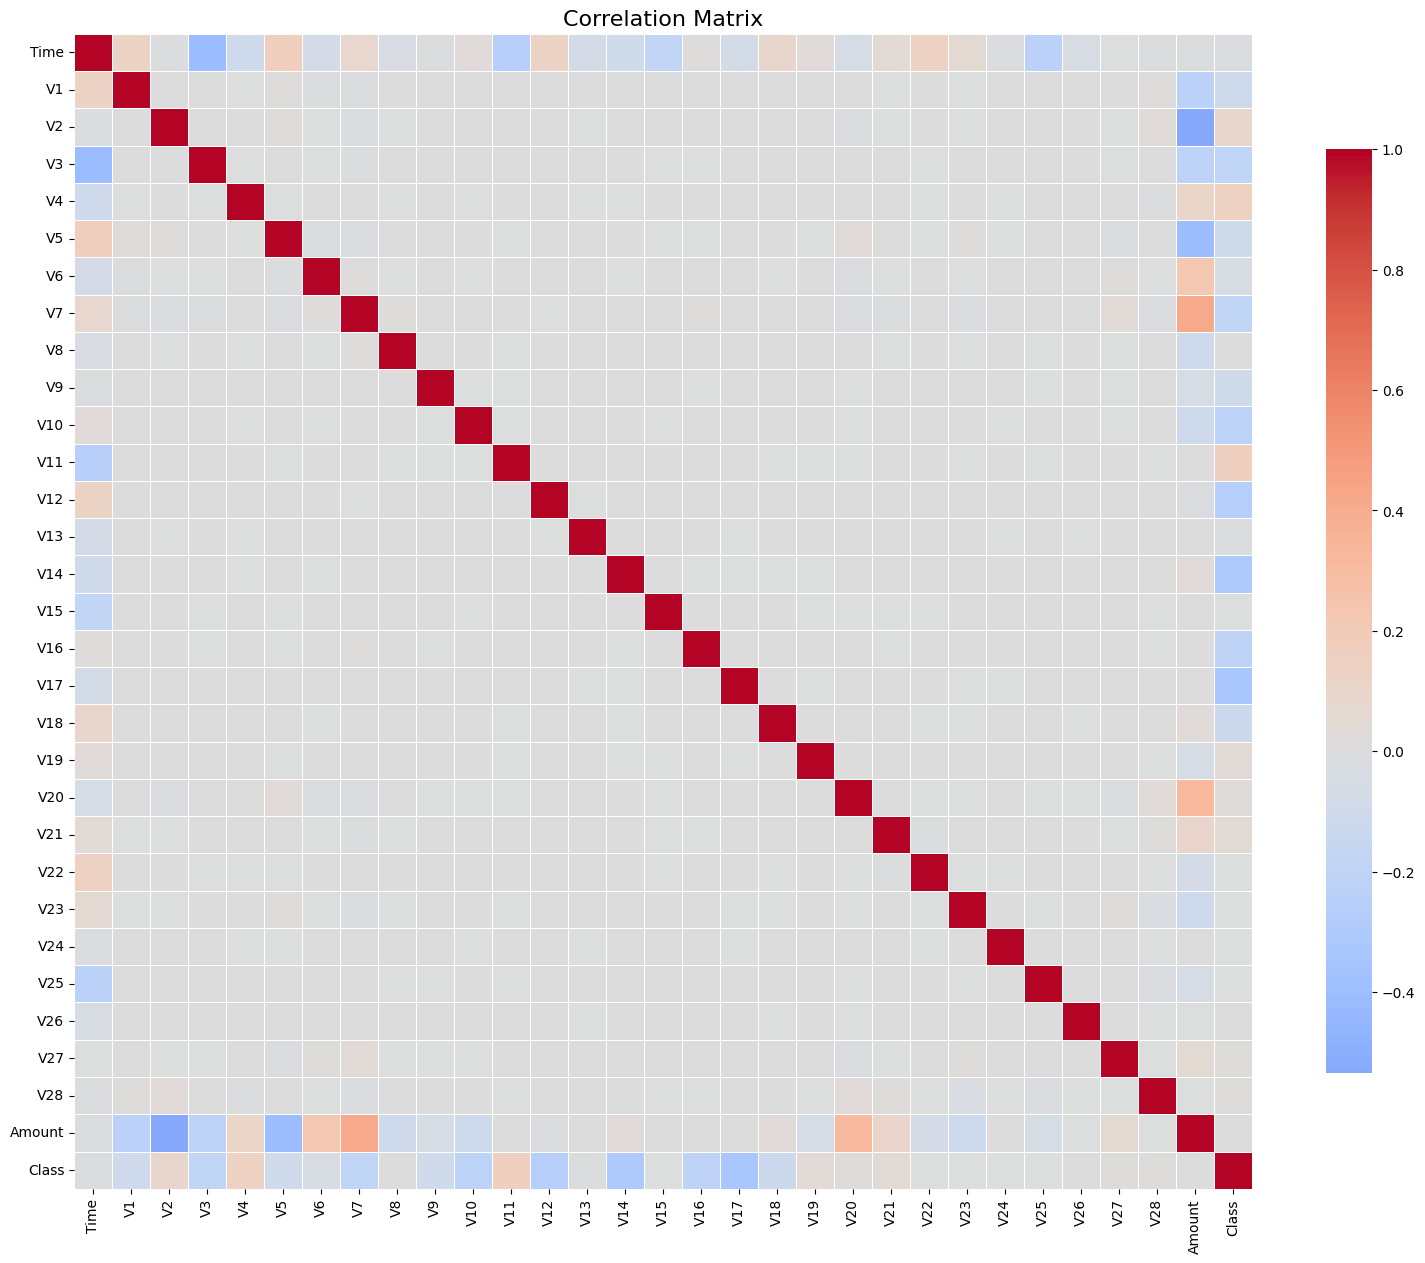

In [37]:
corr = data.corr()

plt.figure(figsize=(19, 15))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0, 
            linewidths=0.5, cbar_kws={"shrink": 0.8})

plt.title("Correlation Matrix", fontsize=16)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show()


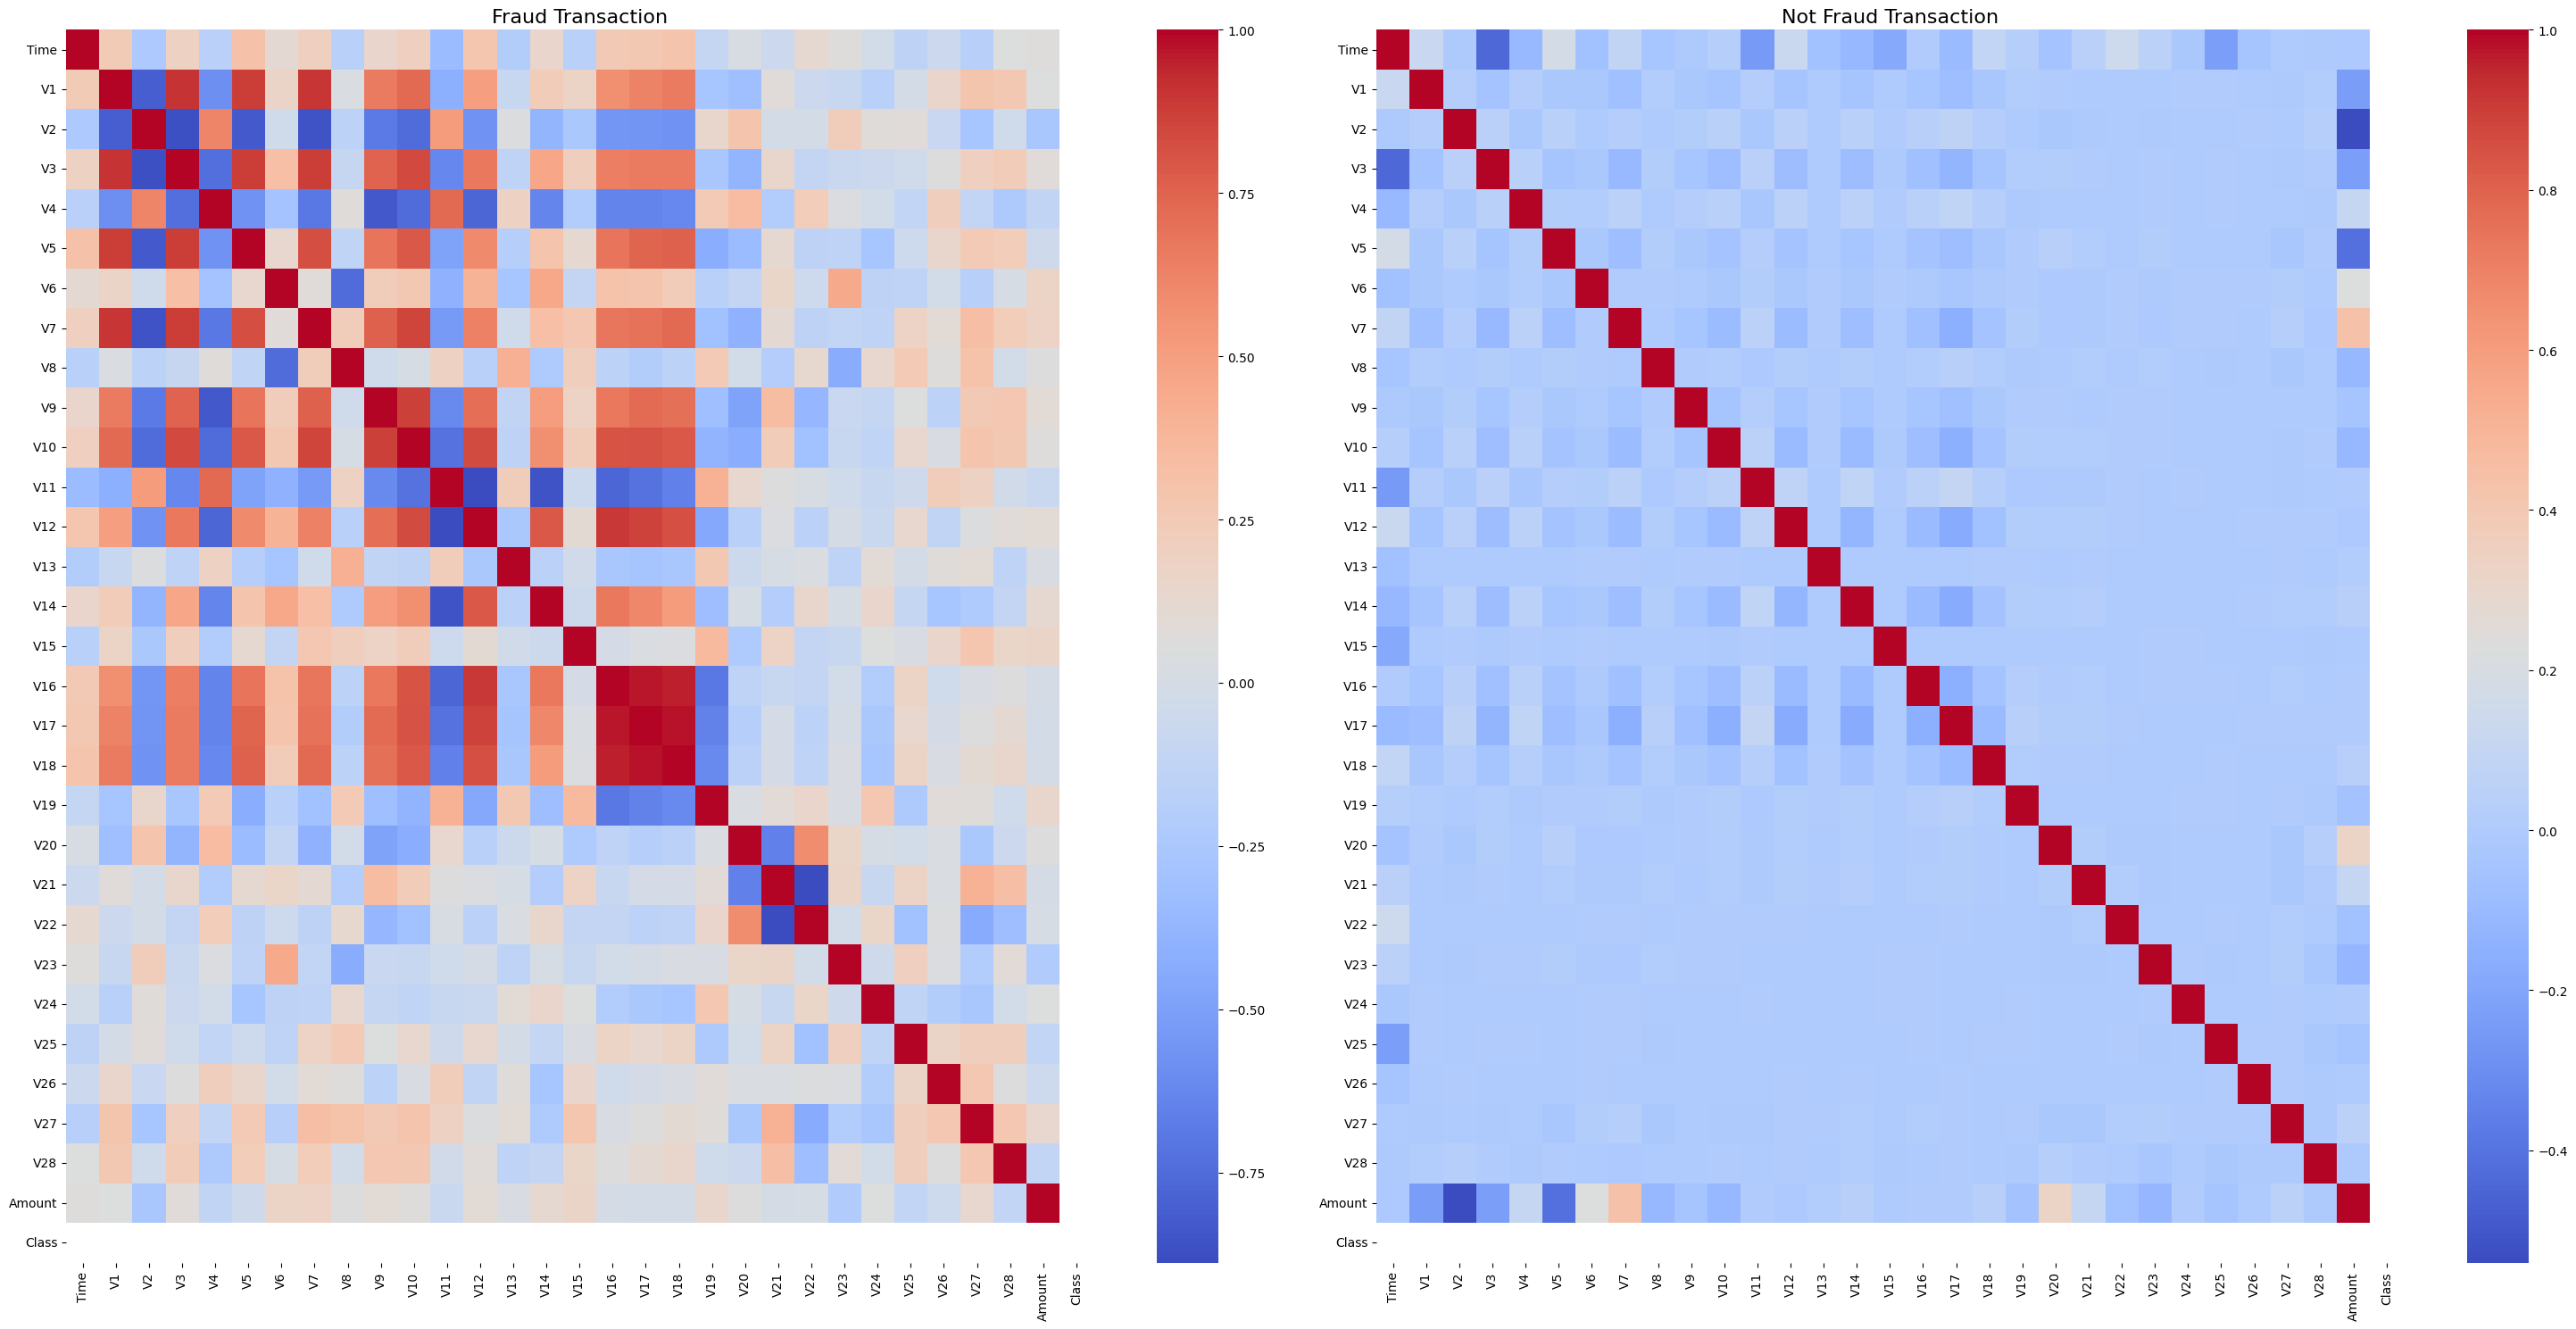

In [38]:
# Split fraud vs non-fraud
fraud_transaction = data[data['Class'] == 1]
not_fraud_transaction = data[data['Class'] == 0]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(30, 15))

# Fraud correlation matrix
sns.heatmap(fraud_transaction.corr(), cmap="coolwarm", annot=False, ax=axes[0])
axes[0].set_title("Fraud Transaction", fontsize=16)

# Non-fraud correlation matrix
sns.heatmap(not_fraud_transaction.corr(), cmap="coolwarm", annot=False, ax=axes[1])
axes[1].set_title("Not Fraud Transaction", fontsize=16)

plt.tight_layout()
plt.show()


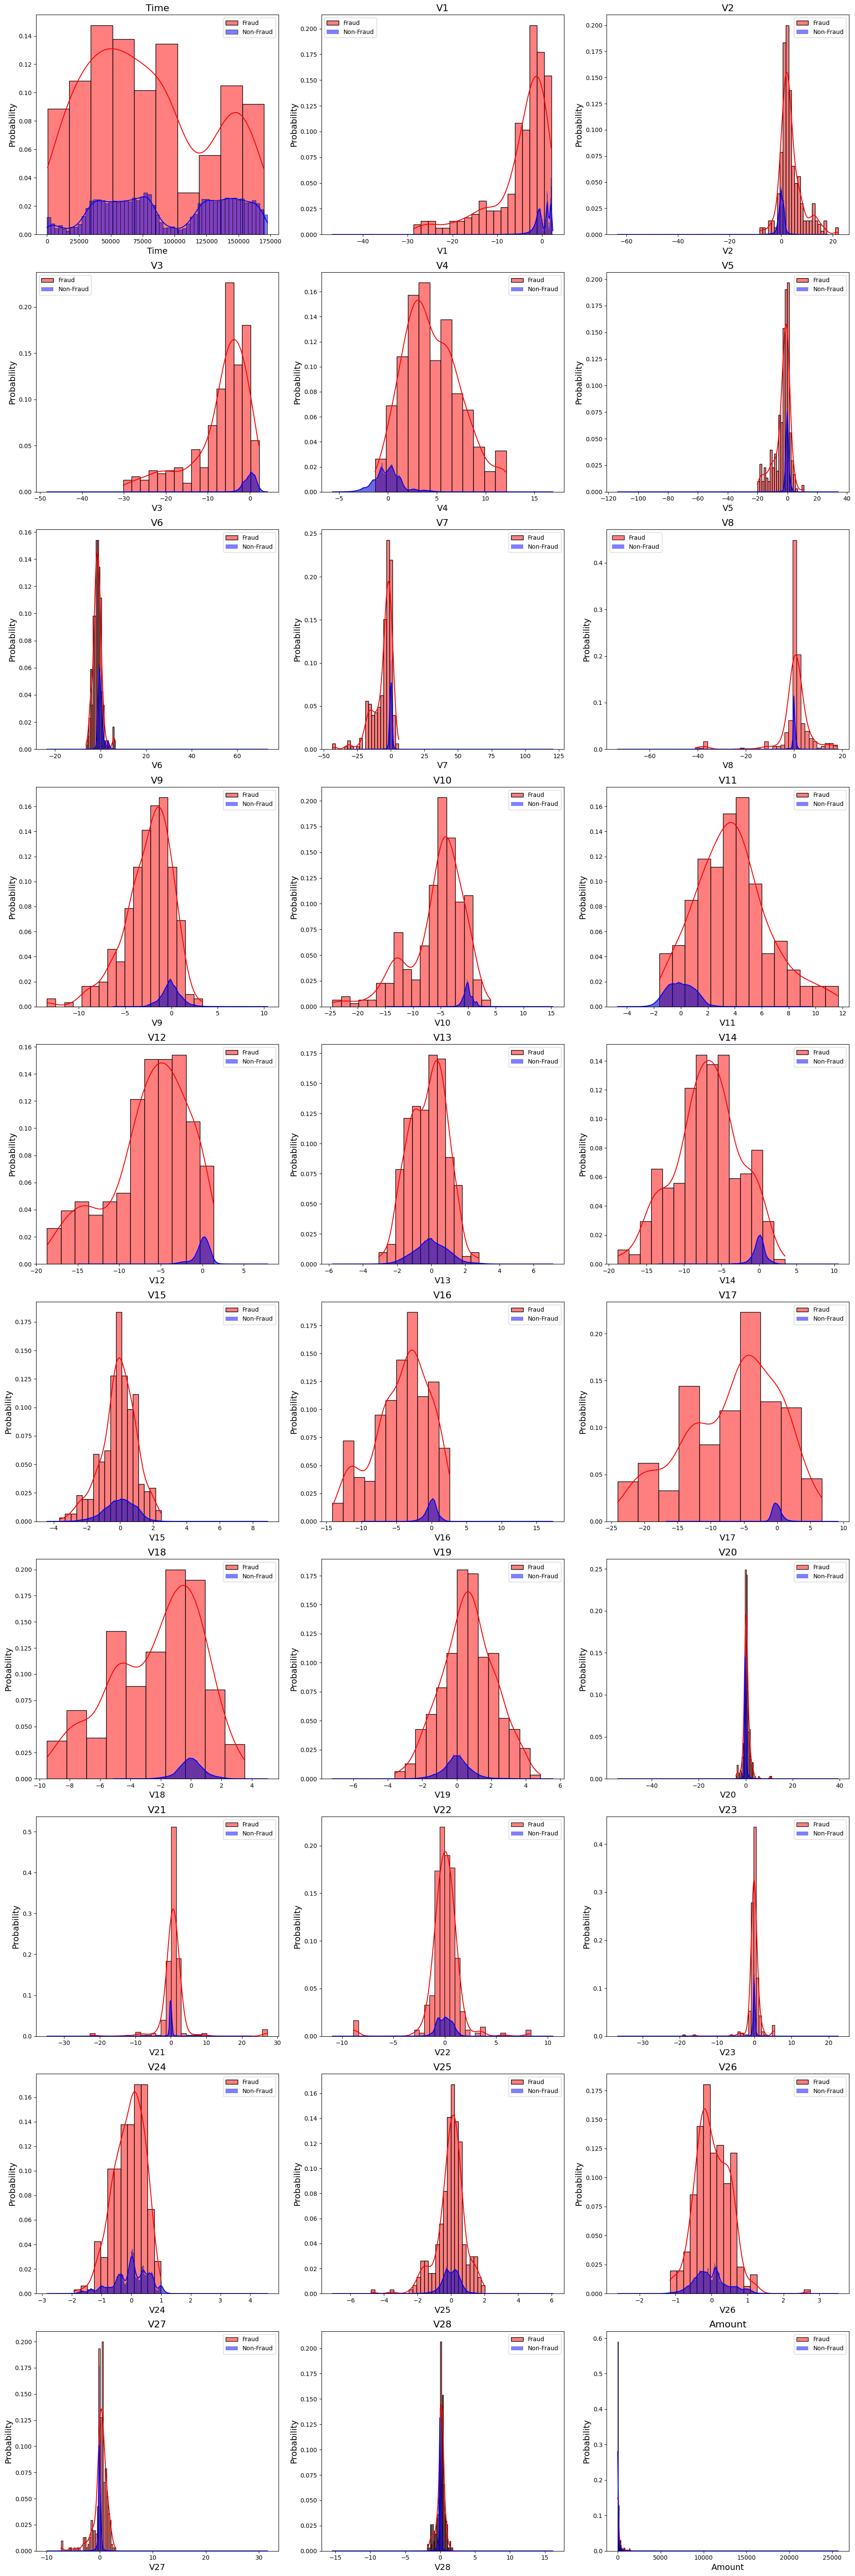

In [39]:
fraud_transaction = data[data['Class'] == 1]
not_fraud_transaction = data[data['Class'] == 0]

figure = plt.figure(figsize=(20, 60))

for i, col in enumerate(data.columns.to_list()):
    if col == 'Class': 
        continue
    
    plt.subplot(10, 3, i + 1)
    
    # Fraud
    sns.histplot(fraud_transaction[col], color='red', label='Fraud',
                 stat='probability', kde=True, fill=True, alpha=0.5) 
    
    # Non-Fraud
    sns.histplot(not_fraud_transaction[col], color='blue', label='Non-Fraud',
                 stat='probability', kde=True, fill=True, alpha=0.5)
    
    plt.title(col, fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Probability', fontsize=14)
    plt.legend()

plt.tight_layout()
plt.show()

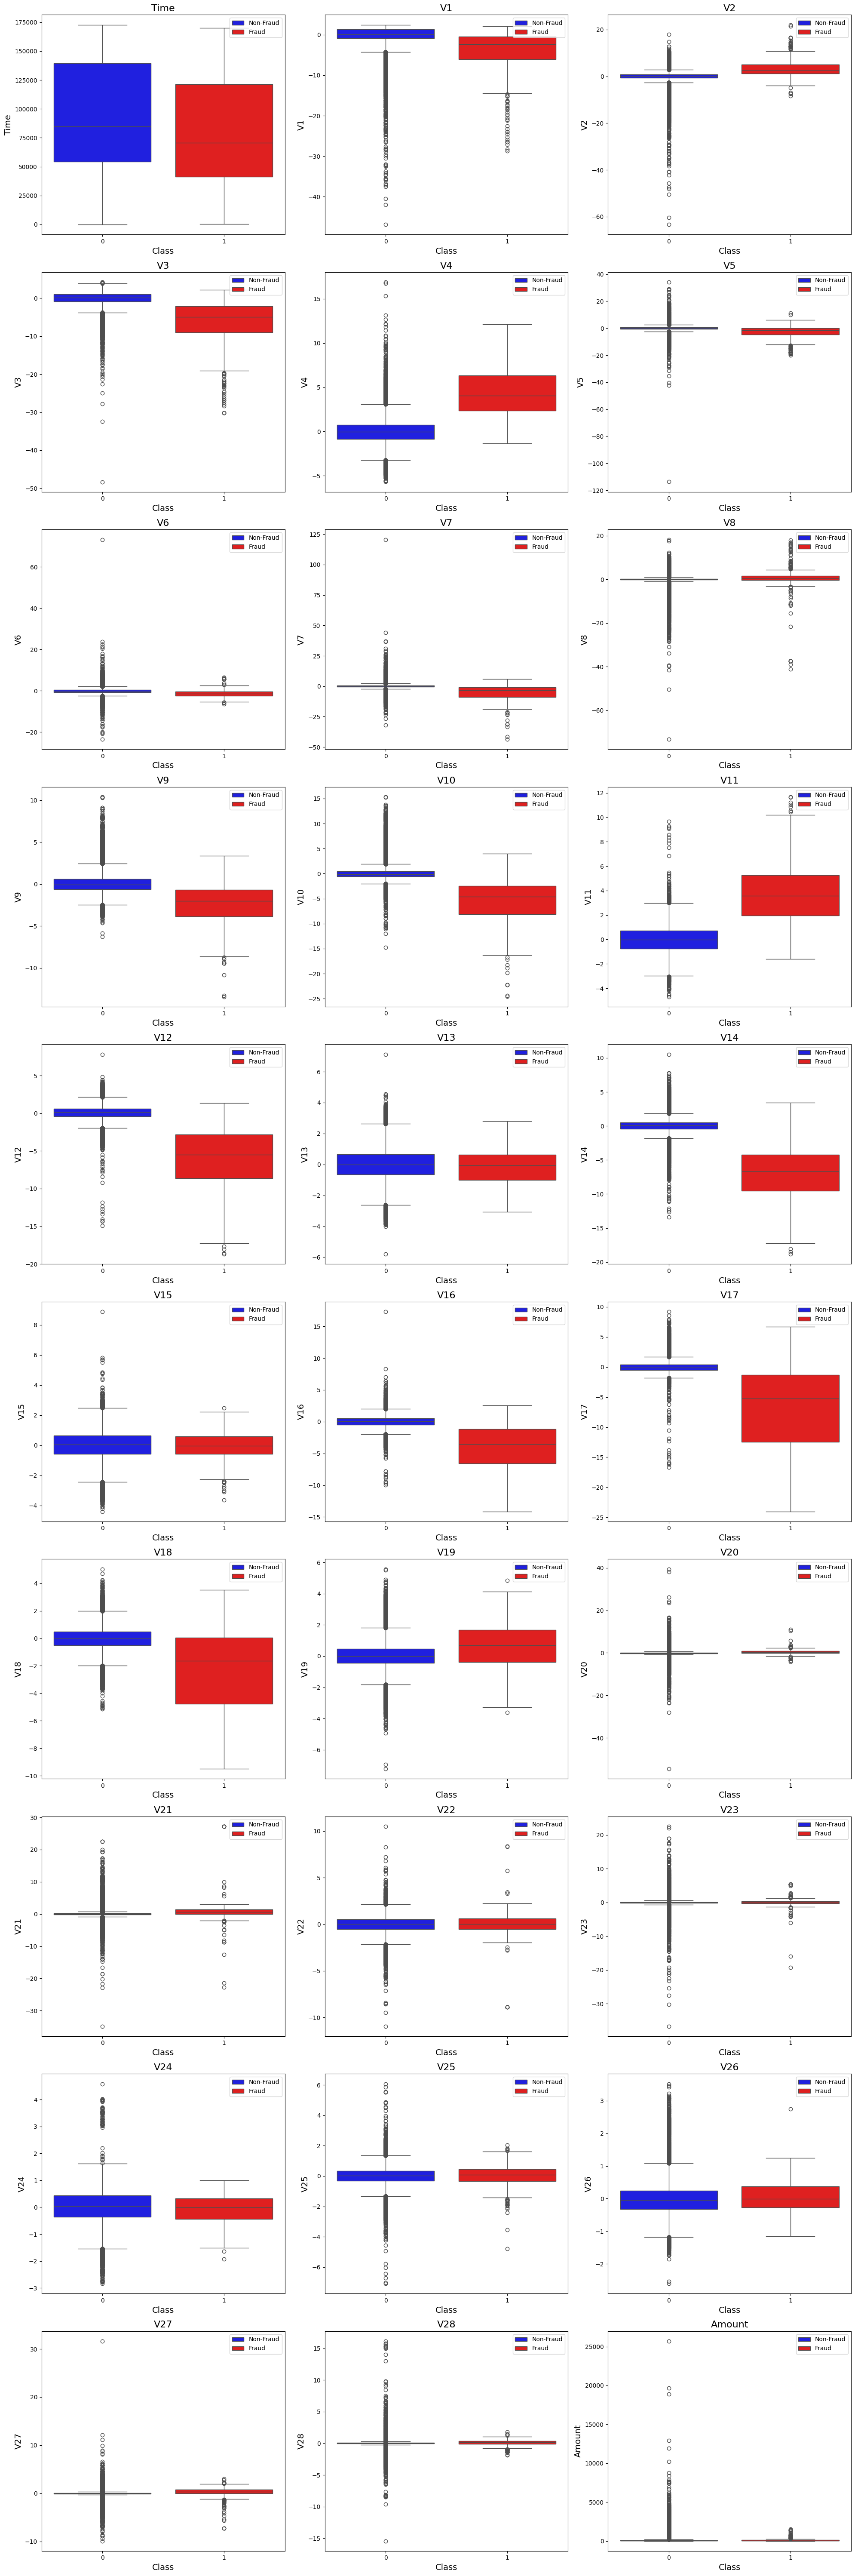

In [40]:
figure = plt.figure(figsize=(20, 60))
for i, col in enumerate(data.columns.to_list()):
    if col == 'Class':
        continue
    plt.subplot(10, 3, i + 1)
    sns.boxplot(x='Class', y=col, data=data, hue='Class', palette=['blue', 'red'])
    plt.title(col, fontsize=16)
    plt.xlabel('Class', fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.legend(labels=['Non-Fraud', 'Fraud'], loc='upper right')
plt.tight_layout()
plt.show()

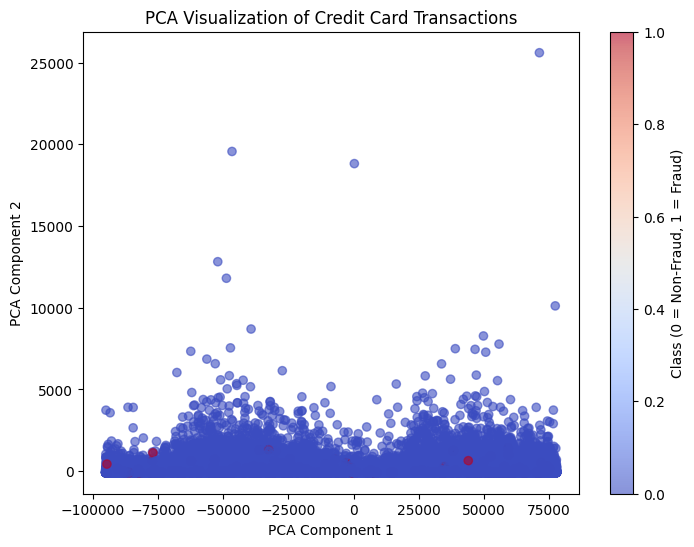

In [41]:
from sklearn.decomposition import PCA

X = data.drop(columns=['Class'])
y = data['Class']

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="coolwarm", alpha=0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Visualization of Credit Card Transactions")
plt.colorbar(label="Class (0 = Non-Fraud, 1 = Fraud)")
plt.show()


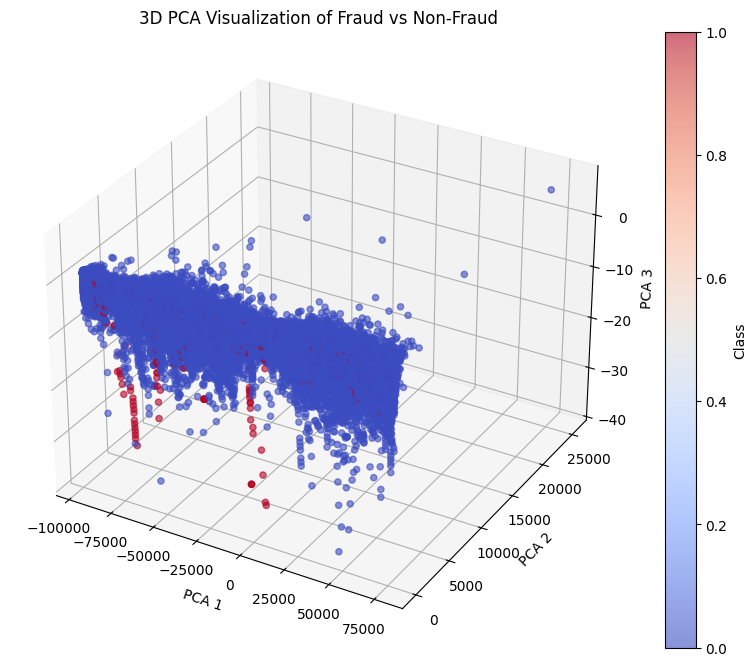

In [42]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# 3D Plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap="coolwarm", alpha=0.6)

ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
ax.set_title("3D PCA Visualization of Fraud vs Non-Fraud")
plt.colorbar(sc, label="Class")
plt.show()


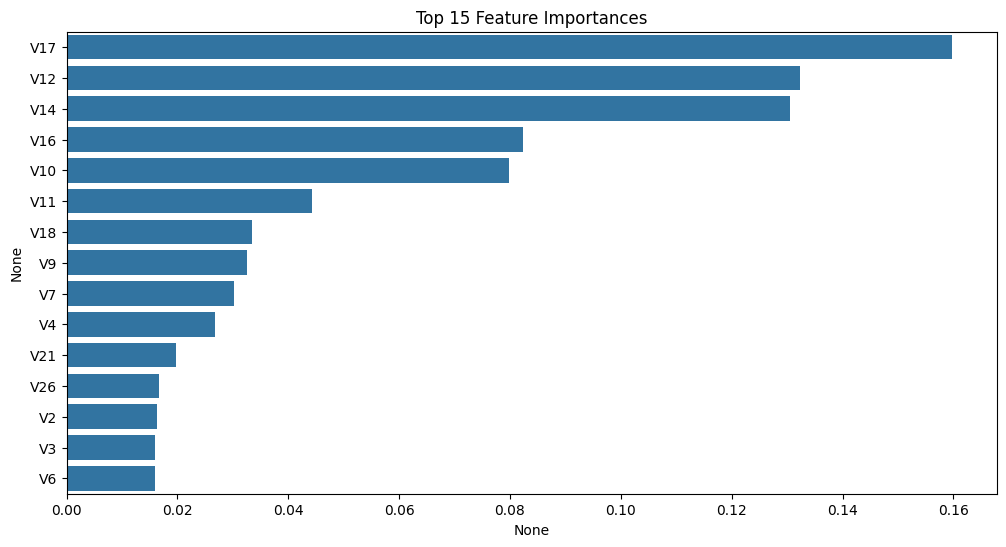

In [43]:
from sklearn.ensemble import RandomForestClassifier

X = data.drop('Class', axis=1)
y = data['Class']

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=importances[:15], y=importances.index[:15])
plt.title("Top 15 Feature Importances")
plt.show()
